### Step 1 – Import Necessary Libraries

In [33]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

### Step 2 – Load and Preprocess the Dataset

In [35]:
# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [37]:
#dropping target so left with only feature names
wine_df=wine_df.drop(columns="target")

In [39]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [41]:
#Checking the shape of the dataframe
print(wine_df.shape)

(178, 13)


In [43]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(wine_df)

### Step 3 – Perform Hierarchical Clustering and Plot the Dendrogram

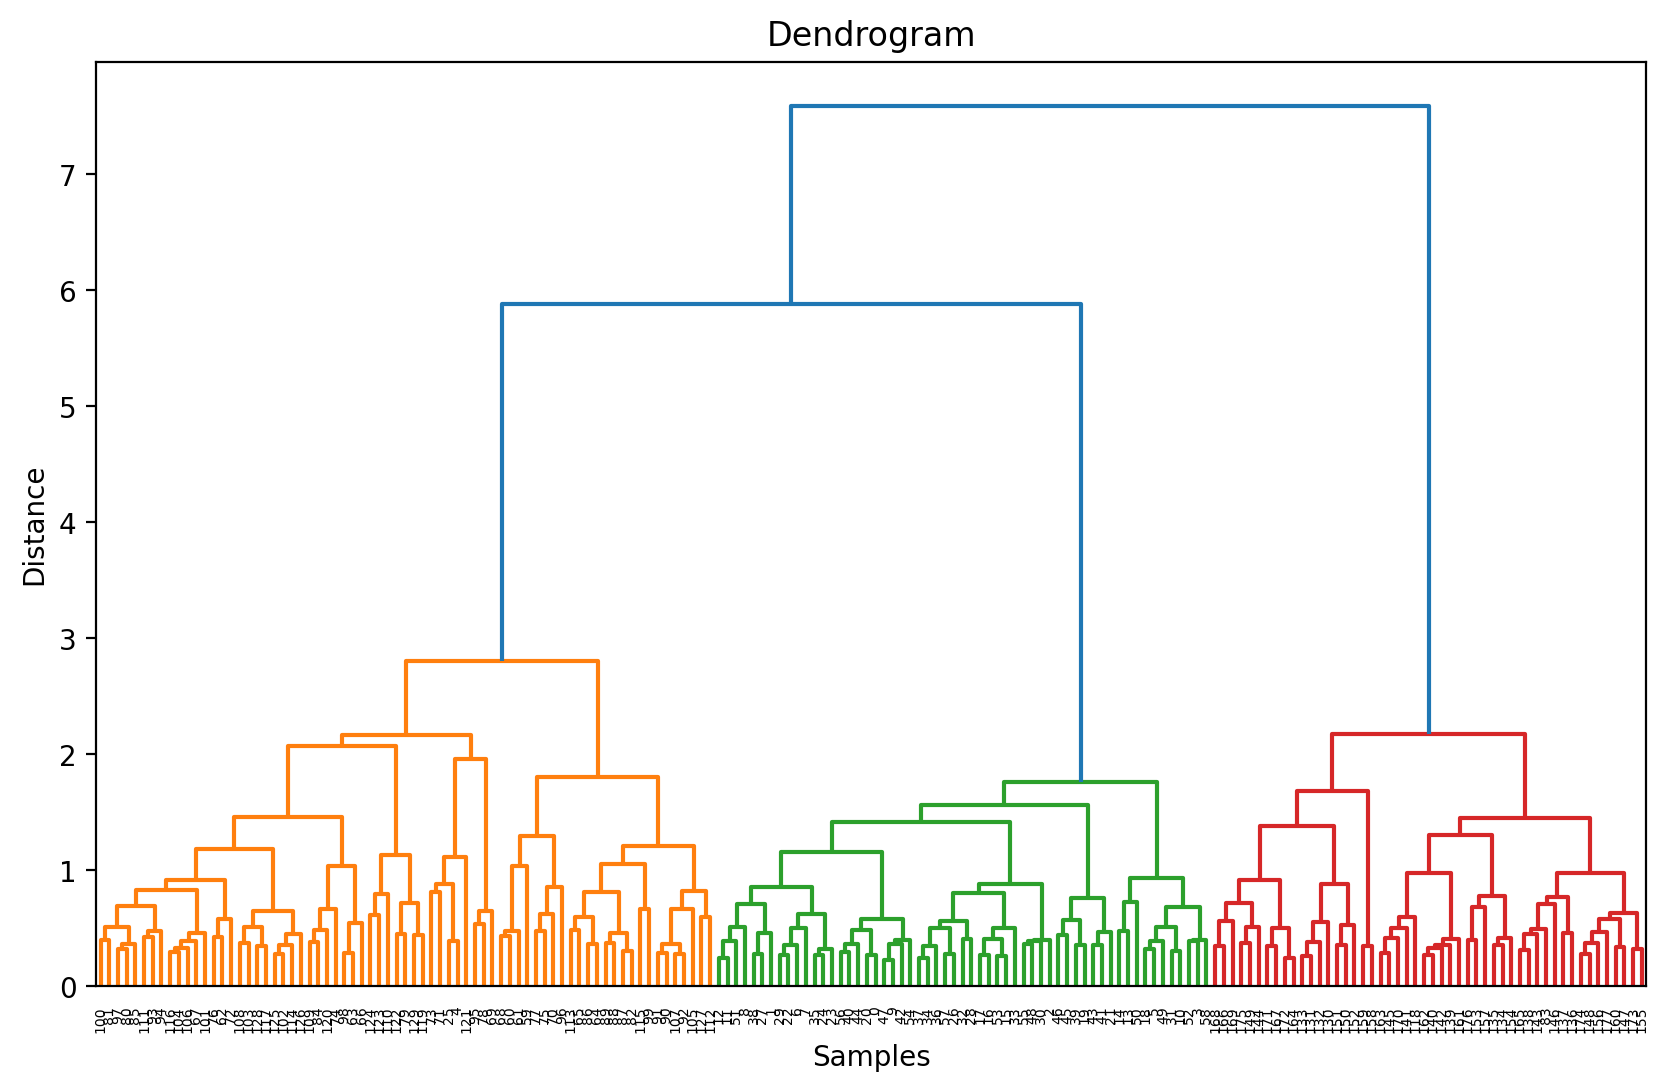

In [52]:
# Calculate linkage matrix using Ward's linkage
# Ward’s linkage minimizes the variance within each cluster
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Because we haven't (yet) truncated the dendrogram, we get to visualize how each of the 178 data points are grouped together into a single cluster.
Though this is seemingly difficult to interpret, we can still see that there are three different clusters.

### Truncating the Dendrogram for Easier Visualization

In practice, instead of the entire dendrogram, we can visualize a truncated version that's easier to interpret and understand.
To truncate the dendrogram, we can set truncate_mode to 'level' and p = 3. 

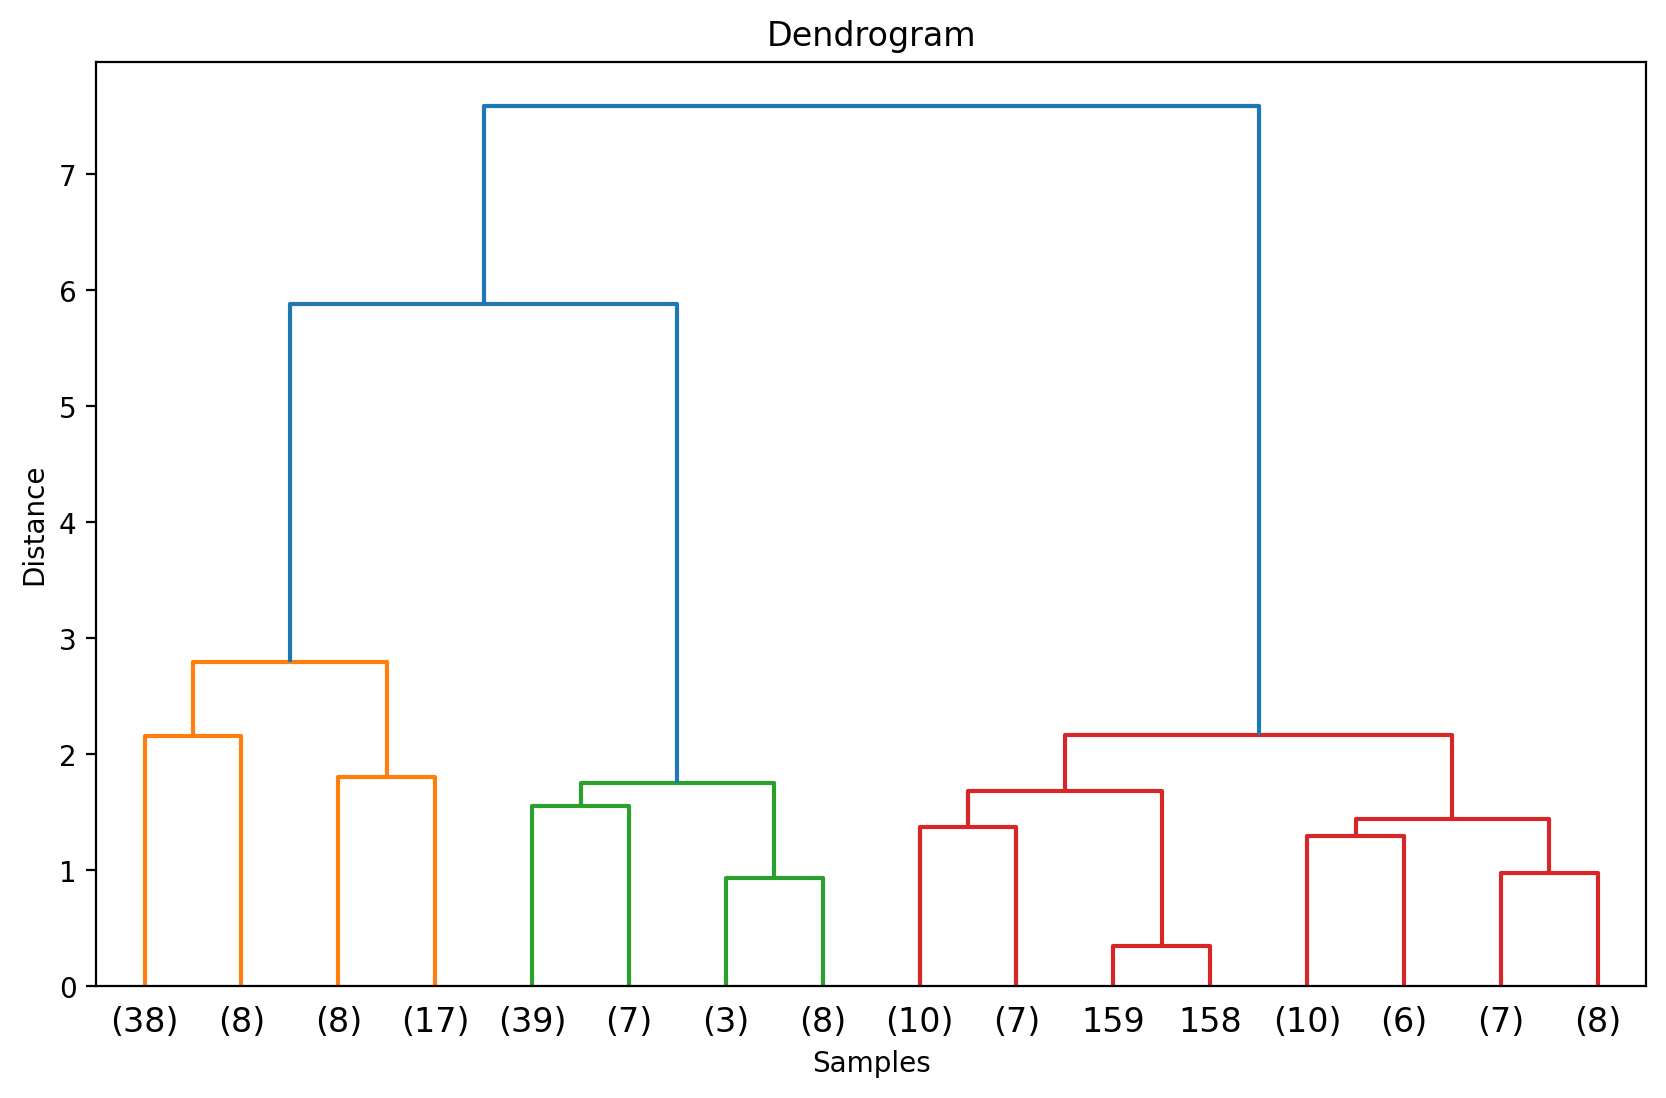

In [59]:
# Calculate linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Doing so truncates the dendrogram to include only those clusters which are within 3 levels from the final merge.<br />

In the above dendrogram, you can see that some data points such as 158 and 159 are represented individually.<br /> 
Whereas some others are mentioned within parentheses; 
these are not individual data points but the number of data points in a cluster.<br /> 
(k) denotes a cluster with k samples.

### Step 4 – Identify the Optimal Number of Clusters

The dendrogram helps us choose the optimal number of clusters. <br />
We can observe where the distance along the y-axis increases drastically, choose to truncate the dendrogram at that point <br />
—and use the distance as the threshold to form clusters. 

For this example, the optimal number of clusters is 3.

### Step 5 – Form the Clusters

Once we have decided on the optimal number of clusters, we can use the corresponding distance along the y-axis—a threshold distance. <br /> This ensures that above the threshold distance, the clusters are no longer merged. We choose a threshold_distance of 3.5 (as inferred from the dendrogram).

We then use fcluster with criterion set to 'distance' to get the cluster assignment for all the data points:

In [85]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold distance based on the dendrogram
threshold_distance = 3.5  

# Cut the dendrogram to get cluster labels
cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Assign cluster labels to the DataFrame
wine_df['cluster'] = cluster_labels

In [89]:
#printing to see the cluster labels (one of {1, 2, 3}) for all the data points
print(wine_df['cluster'])

0      2
1      2
2      2
3      2
4      3
      ..
173    1
174    1
175    1
176    1
177    1
Name: cluster, Length: 178, dtype: int32


### Step 6 – Visualize the Clusters

Now that each data point has been assigned to a cluster, you can visualize a <br />
subset of features and their cluster assignments. 
Here's the scatter plot of two such features along with their cluster mapping:

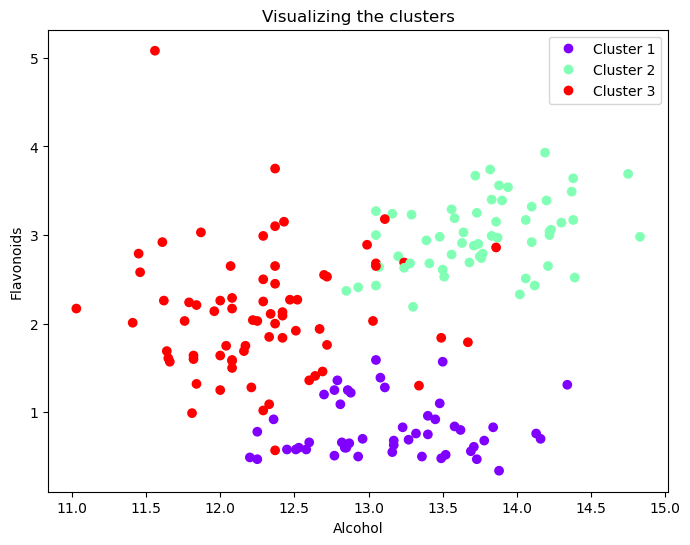

In [102]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], c=wine_df['cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.title('Visualizing the clusters')

# Add legend
n_clusters=3
legend_labels = [f'Cluster {i + 1}' for i in range(n_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

### Agglomerative Clustering

In [104]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(X_scaled)

clustering.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [106]:
wine_df2=wine_df.copy()
wine_df2['cluster'] = clustering.labels_

In [108]:
print(wine_df2['cluster'])

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Name: cluster, Length: 178, dtype: int64


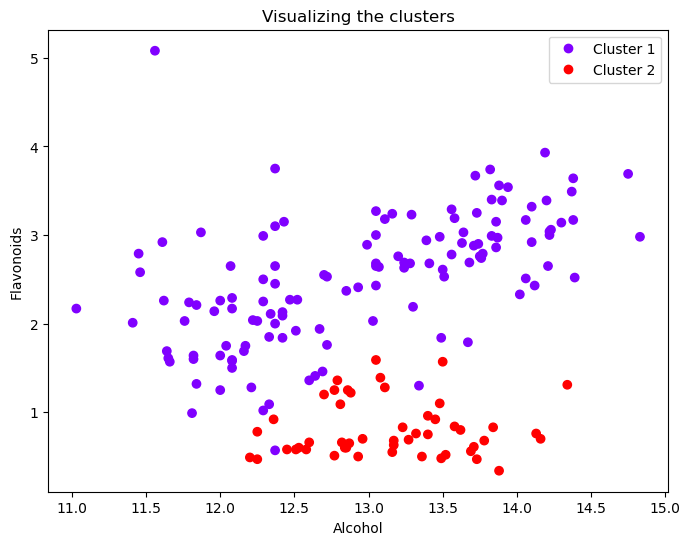

In [110]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(wine_df2['alcohol'], wine_df2['flavanoids'], c=wine_df2['cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.title('Visualizing the clusters')

# Add legend
n_clusters=3
legend_labels = [f'Cluster {i + 1}' for i in range(n_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

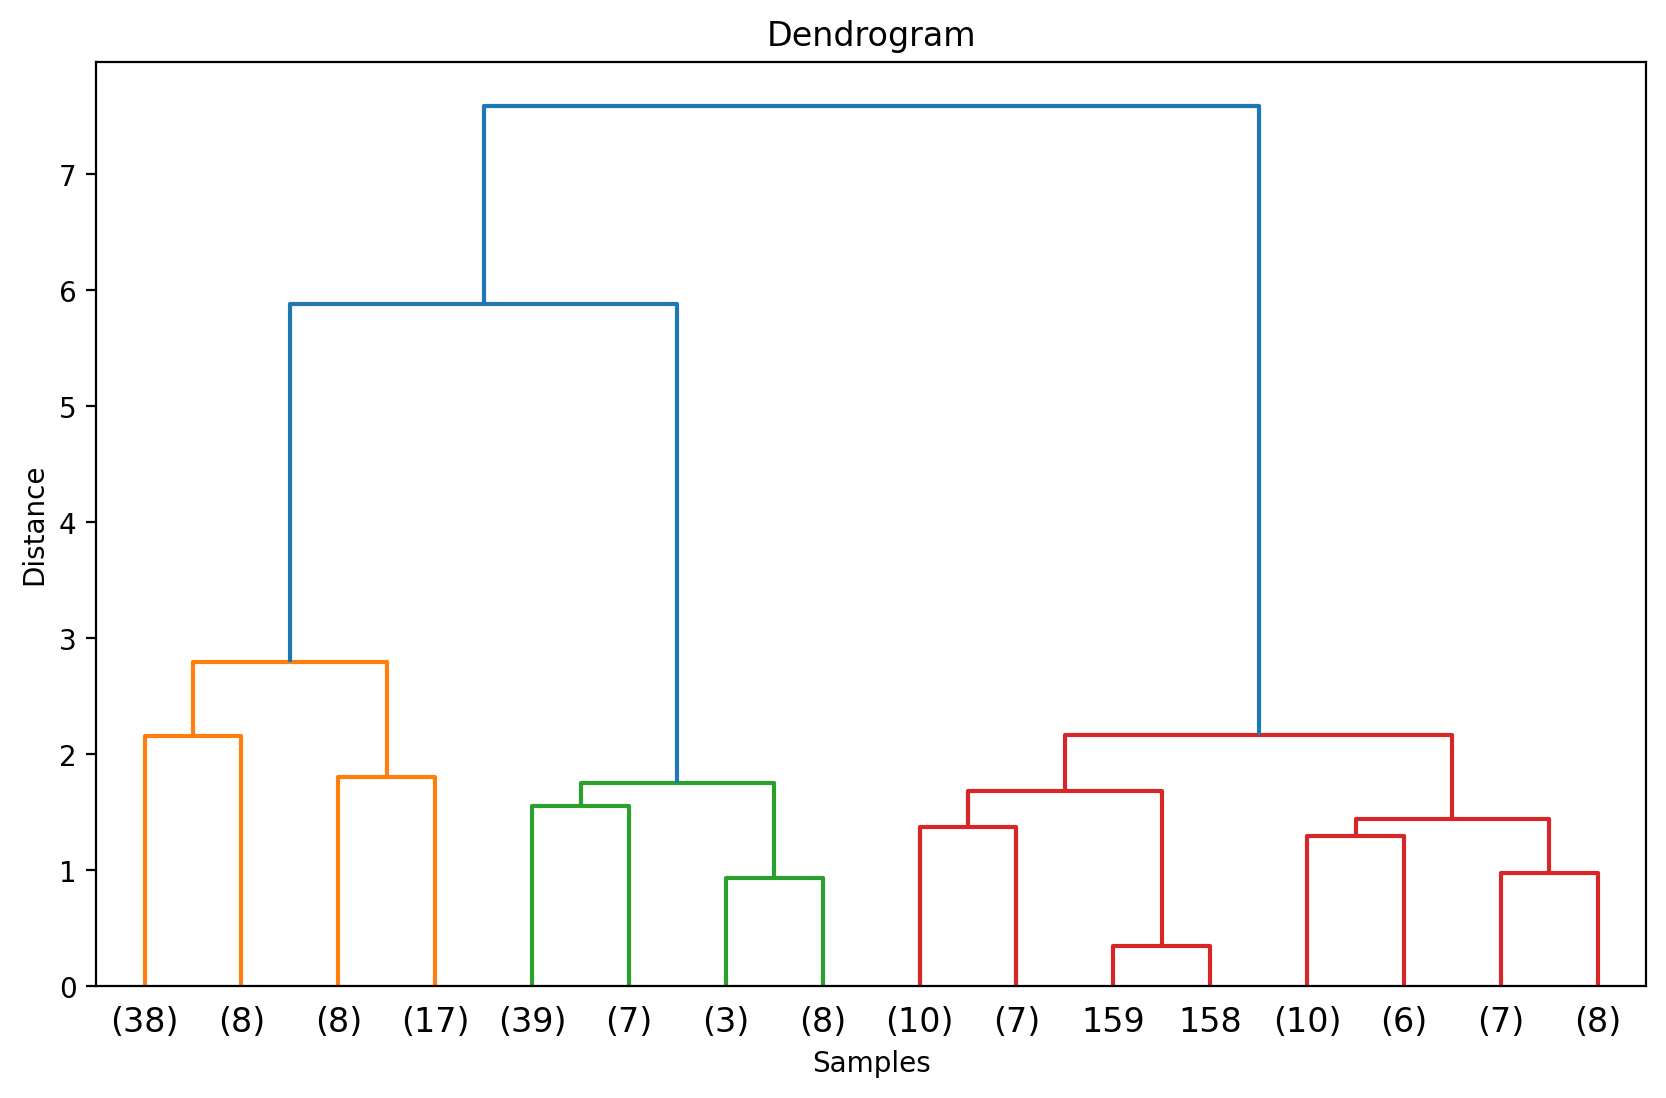

In [131]:
# Plot dendrogram
Z = linkage(X_scaled,method='ward')

plt.figure(figsize=(10, 6),dpi=200)
dendrogram(Z, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--') 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(100, color='crimson') 
plt.show()